# Utmaning: Analysera text om datavetenskap

I det här exemplet ska vi göra en enkel övning som täcker alla steg i en traditionell datavetenskapsprocess. Du behöver inte skriva någon kod, du kan bara klicka på cellerna nedan för att köra dem och observera resultatet. Som en utmaning uppmuntras du att testa koden med olika data.

## Mål

I den här lektionen har vi diskuterat olika koncept relaterade till datavetenskap. Låt oss försöka upptäcka fler relaterade koncept genom att göra lite **textutvinning**. Vi kommer att börja med en text om datavetenskap, extrahera nyckelord från den och sedan försöka visualisera resultatet.

Som text kommer jag att använda sidan om datavetenskap från Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Steg 1: Hämta data

Första steget i varje datavetenskapsprocess är att hämta data. Vi kommer att använda biblioteket `requests` för att göra detta:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Steg 2: Omvandla data

Nästa steg är att konvertera data till en form som är lämplig för bearbetning. I vårt fall har vi laddat ner HTML-källkoden från sidan, och vi behöver omvandla den till ren text.

Det finns många sätt att göra detta. Vi kommer att använda det enklaste inbyggda objektet [HTMLParser](https://docs.python.org/3/library/html.parser.html) från Python. Vi behöver skapa en subklass av `HTMLParser`-klassen och definiera koden som samlar in all text inuti HTML-taggar, förutom `<script>`- och `<style>`-taggar.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Steg 3: Få insikter

Det viktigaste steget är att omvandla vår data till en form där vi kan dra insikter. I vårt fall vill vi extrahera nyckelord från texten och se vilka nyckelord som är mer betydelsefulla.

Vi kommer att använda Python-biblioteket [RAKE](https://github.com/aneesha/RAKE) för nyckelordsutvinning. Först installerar vi detta bibliotek om det inte redan finns:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Huvudfunktionen är tillgänglig från `Rake`-objektet, som vi kan anpassa med hjälp av några parametrar. I vårt fall kommer vi att ställa in den minsta längden på ett nyckelord till 5 tecken, den minsta frekvensen av ett nyckelord i dokumentet till 3 och det maximala antalet ord i ett nyckelord till 2. Känn dig fri att experimentera med andra värden och observera resultatet.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Vi fick en lista med termer tillsammans med deras tillhörande viktighet. Som du kan se finns de mest relevanta områdena, såsom maskininlärning och big data, med i listan på toppositioner.

## Steg 4: Visualisera resultatet

Människor tolkar data bäst i visuell form. Därför är det ofta vettigt att visualisera data för att dra vissa insikter. Vi kan använda biblioteket `matplotlib` i Python för att plotta en enkel fördelning av nyckelorden med deras relevans:


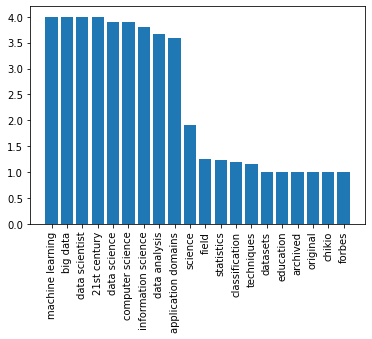

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Det finns dock ett ännu bättre sätt att visualisera ordfrekvenser - att använda **Word Cloud**. Vi behöver installera ett annat bibliotek för att skapa ett ordmoln från vår nyckelordslista.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objektet är ansvarigt för att ta emot antingen originaltext eller en förberäknad lista med ord och deras frekvenser, och returnerar en bild som sedan kan visas med hjälp av `matplotlib`:


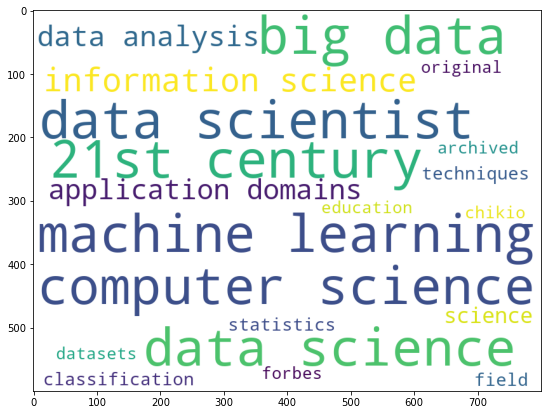

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Vi kan också skicka in den ursprungliga texten till `WordCloud` - låt oss se om vi kan få ett liknande resultat:


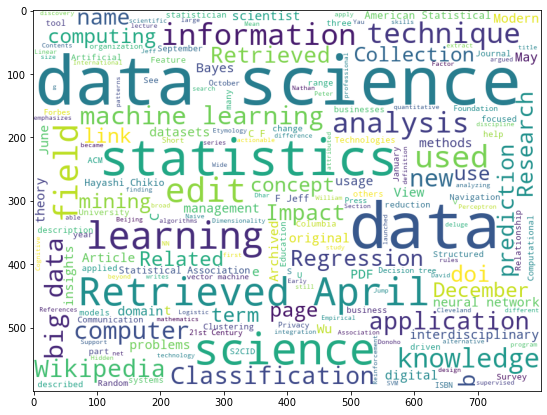

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Du kan se att ordmolnet nu ser mer imponerande ut, men det innehåller också mycket brus (t.ex. orelaterade ord som `Retrieved on`). Dessutom får vi färre nyckelord som består av två ord, såsom *data scientist* eller *computer science*. Detta beror på att RAKE-algoritmen gör ett mycket bättre jobb med att välja ut bra nyckelord från texten. Detta exempel illustrerar vikten av datarensning och förbehandling, eftersom en tydlig bild i slutändan gör det möjligt för oss att fatta bättre beslut.

I denna övning har vi gått igenom en enkel process för att extrahera viss mening från Wikipedia-text, i form av nyckelord och ordmoln. Detta exempel är ganska enkelt, men det visar tydligt alla typiska steg en data scientist tar när de arbetar med data, från datainsamling till visualisering.

I vår kurs kommer vi att diskutera alla dessa steg i detalj.



---

**Ansvarsfriskrivning**:  
Detta dokument har översatts med hjälp av AI-översättningstjänsten [Co-op Translator](https://github.com/Azure/co-op-translator). Även om vi strävar efter noggrannhet, vänligen notera att automatiska översättningar kan innehålla fel eller felaktigheter. Det ursprungliga dokumentet på sitt originalspråk bör betraktas som den auktoritativa källan. För kritisk information rekommenderas professionell mänsklig översättning. Vi ansvarar inte för eventuella missförstånd eller feltolkningar som uppstår vid användning av denna översättning.
